Let's play a bit with our current XHM results. First, let's check how the variants we found vary with data quality. We could assume Q=60 like their paper, but it's worth checking how it changes across quality thresholds. Also, let's plot that value per samples, as CCGO samples seemed to have some noise to them:

In [47]:
import vcf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [71]:
vcf_reader = vcf.Reader(open('/data/NCR_SBRB/simplex/xhmm/DATA.vcf', 'r'))
SQs = {}
LQs = {}
RQs = {}
for sample in vcf_reader.samples:
    SQs[sample] = []
    LQs[sample] = []
    RQs[sample] = []
for record in vcf_reader:
    for sample in record.samples:
        SQs[sample.sample].append(sample.data.SQ)
        LQs[sample.sample].append(sample.data.LQ)
        RQs[sample.sample].append(sample.data.RQ)

In [90]:
quality = np.arange(10, 100, 10)
cnvs = np.zeros([len(quality), len(vcf_reader.samples)])
for q, qual in enumerate(quality):
    qual_prime = qual / 2.0
    for s, sample in enumerate(vcf_reader.samples):
        some_deletion = np.any(np.array(SQs[sample]) >= qual, axis=1)
        good_left = np.any(np.array(LQs[sample]) >= qual_prime, axis=1)
        good_right = np.any(np.array(RQs[sample]) >= qual_prime, axis=1)
        idx = np.logical_and(some_deletion,
                             np.logical_or(good_left, good_right))
        cnvs[q, s] = np.sum(idx) 

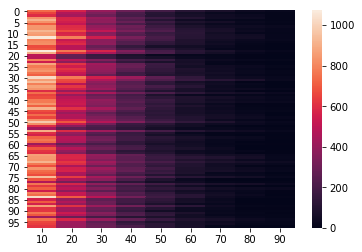

In [91]:
sns.heatmap(cnvs.T, xticklabels=quality)

There doesn't seem to be many outliars, which is good, but Q=60 seems a bit optimistic. We'll need to play with it a bit. Not sure if the control subjects are biasing this... need to look at the papers to see if it's better to run within groups? Before we do that, let's restrict the colors first:

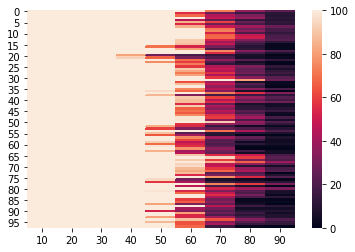

In [94]:
sns.heatmap(cnvs.T, xticklabels=quality, vmax=100)

Well, 100 or less CNVs might not be a bad value to start with. Now we need to split which ones are de novo and inherited.

# TODO:

* split CNVs into denovo and inherited
* better to run PCA within groups? are controls biasing the results? check literature. might need ot run other tools instead